In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import polyglot
import os
from polyglot.text import Text, Word
from polyglot.mapping import Embedding
from polyglot.detect import Detector

import nltk
from nltk.corpus import stopwords
import numpy as np
import random
from matplotlib.ticker import NullFormatter






__file__ = os.getcwd()
dirname = os.path.dirname(__file__)
input_file = os.path.join(dirname, 'scripts\\data\\dogodki_stripped.csv')
df = pd.read_csv(input_file, header = 0)
original_headers = list(df.columns.values)
data_opis = df['opis'].astype('U')

original_list = list(data_opis)
_SAMPLE_SIZE = 150
sampled_list = random.sample(original_list, _SAMPLE_SIZE)

delezByCountry = []
delezByCountryFilterNoSlov = []
ponovitevKombinacijeJezika = {}
ponovitevKombinacijeJezikaNatancno = {}

countNapak = 0
for row in original_list:
    try:
        komb_Key = ''
        komb_KeyNatancno = ''
        detector = Detector(str(row), quiet=True)
        dog = {}
        for language in detector.languages:
            if language.code != 'un':
                #print(language)
                dist = {
                "code": language.code,
                "confidence": language.confidence,
                "count": len(str(row)) * (language.confidence / 100)
                }
                komb_Key += (' ' if len(komb_Key) > 0 else '') + language.code
                if language.confidence > 2:
                    komb_KeyNatancno += (' ' if len(komb_KeyNatancno) > 0 else '') + language.code
                dog[language.code] = dist
        delezByCountry.append(dog)
        if(dog['sl']['confidence'] < 99):
            delezByCountryFilterNoSlov.append(dog)
            
        if komb_Key in ponovitevKombinacijeJezika:
            ponovitevKombinacijeJezika[komb_Key] = ponovitevKombinacijeJezika[komb_Key] + 1
        else:
            ponovitevKombinacijeJezika[komb_Key] = 1

        if komb_KeyNatancno in ponovitevKombinacijeJezikaNatancno:
            ponovitevKombinacijeJezikaNatancno[komb_KeyNatancno] = ponovitevKombinacijeJezikaNatancno[komb_KeyNatancno] + 1
        else:
            ponovitevKombinacijeJezikaNatancno[komb_KeyNatancno] = 1
        
    except:
        countNapak = countNapak + 1

print('Število napak: ' + str(countNapak))

N = len(delezByCountry)
slDelez = [0] * N
enDelez = [0] * N

slStevilo = [0] * N
enStevilo = [0] * N




for i in range(len(delezByCountry)):
    if('sl' in delezByCountry[i]):
        slDelez[i] = delezByCountry[i]['sl']['confidence']
        slStevilo[i] = delezByCountry[i]['sl']['count']
        
    if('en' in delezByCountry[i]):
        enDelez[i] = delezByCountry[i]['en']['confidence']
        enStevilo[i] = delezByCountry[i]['en']['count']
        

def scatter_hist(x, y, limBottom, limTop, labelX, labelY):
    nullfmt = NullFormatter()        

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # the scatter plot:
    axScatter.scatter(x, y)
    axScatter.set_xlabel(labelX, fontsize=15)
    axScatter.set_ylabel(labelY, fontsize=15)

    # now determine nice limits by hand:
    binwidth = round((limTop - limBottom) / 100)
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])

    axScatter.set_xlim((limBottom, limTop))
    axScatter.set_ylim((limBottom, limTop))

    bins = np.arange(limBottom, limTop + binwidth, binwidth)
    axHistx.hist(x, bins=bins, log=True)
    axHisty.hist(y, bins=bins, orientation='horizontal', log=True)

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())

    plt.show()



Število napak: 147


Število ponovitev vseh kombinacij jezikov


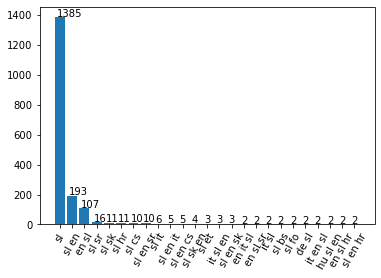

sl: 1385
sl en: 193
en sl: 107
sl sr: 16
sl sk: 11
sl hr: 11
sl cs: 10
sl en sr: 10
sl it: 6
sl en it: 5
sl en cs: 5
sl sk en: 4
sl et: 3
it sl en: 3
sl en sk: 3
en it sl: 2
en sl sr: 2
it sl: 2
sl bs: 2
sl fo: 2
de sl: 2
it en sl: 2
hu sl en: 2
en sl hr: 2
sl en hr: 2
sl sco: 1
sl en bs: 1
sl cs ms: 1
hu sl: 1
sl en es: 1
cs bs sl: 1
sl de en: 1
sl cs en: 1
en sl de: 1
sl en fy: 1
sl en sa: 1
de en sl: 1
en sl it: 1
sl it de: 1
cs sl: 1
en sl sq: 1
sl kha: 1
sl jw: 1
en hr sl: 1
sl da: 1
sl it en: 1
sl qu en: 1
sl lt: 1
sr sl en: 1
sl en de: 1
sl ie: 1
sl mfe: 1
sr sl: 1


In [22]:


print('Število ponovitev vseh kombinacij jezikov')

ponovitevKombinacijeJezika = {k: v for k, v in sorted(ponovitevKombinacijeJezika.items(), key=lambda item: item[1], reverse=True)}    # sortiramo dictonary


ponovitevKombinacijeJezikaFilter = {}
for key, value in ponovitevKombinacijeJezika.items():
    if value > 1:
        ponovitevKombinacijeJezikaFilter[key] = value

plt.bar(range(len(ponovitevKombinacijeJezikaFilter)), ponovitevKombinacijeJezikaFilter.values(), align='center', tick_label=ponovitevKombinacijeJezikaFilter.values())
xlocs, xlabs = plt.xticks()

for i, v in enumerate(ponovitevKombinacijeJezikaFilter.values()):
    plt.text(xlocs[i] - 0.25, v + 5, str(v))
plt.xticks(range(len(ponovitevKombinacijeJezikaFilter)), list(ponovitevKombinacijeJezikaFilter.keys()), rotation=60)
plt.show()

for key, value in ponovitevKombinacijeJezika.items():
    print(key + ': ' + str(value))

Scatter histogram DELEŽ JEZIKA V Slo(%)/Ang(%)


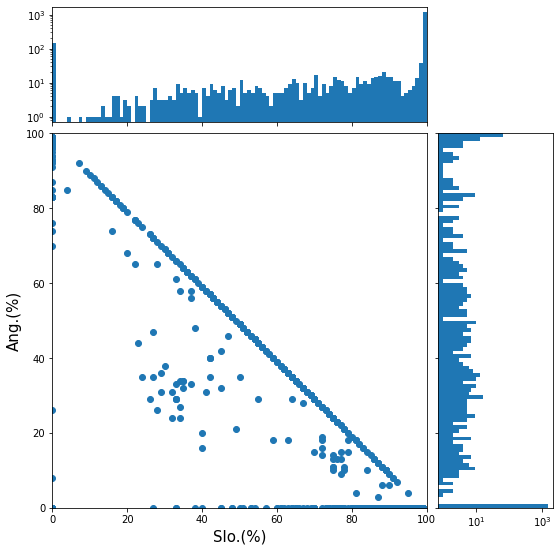

In [17]:

print('Scatter histogram DELEŽ JEZIKA V Slo(%)/Ang(%)')
scatter_hist(slDelez, enDelez, 0, 100, 'Slo.(%)', 'Ang.(%)')

Ker je veliko število dogodkov kjer so celotno v slovenščini jih sfiltriramo.
Scatter histogram DELEŽ JEZIKA BESED Slo(%)/Ang(%) - brez dogodkov kjer je opis v celoti(99%) v slovenščini


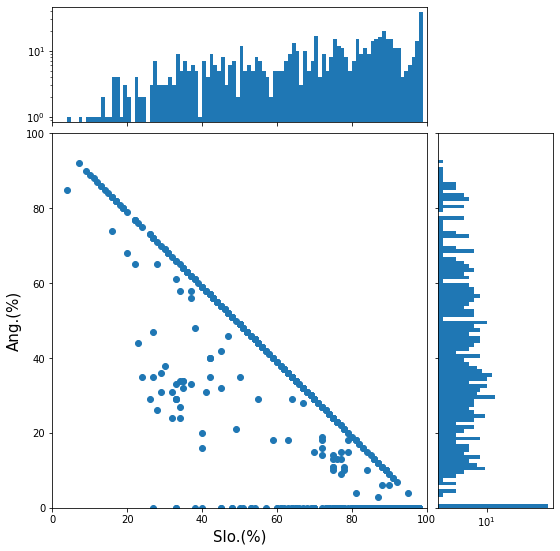

In [8]:


print('Ker je veliko število dogodkov kjer so celotno v slovenščini jih sfiltriramo.')

iNoSlov = len(delezByCountryFilterNoSlov)
slDelezNoSlov = [0] * iNoSlov
enDelezNoSlov = [0] * iNoSlov

slSteviloNoSlov = [0] * iNoSlov
enSteviloNoSlov = [0] * iNoSlov


for i in range(len(delezByCountryFilterNoSlov)):
    if('sl' in delezByCountryFilterNoSlov[i]):
        slDelezNoSlov[i] = delezByCountryFilterNoSlov[i]['sl']['confidence']
        slSteviloNoSlov[i] = delezByCountryFilterNoSlov[i]['sl']['count']
        
    if('en' in delezByCountryFilterNoSlov[i]):
        enDelezNoSlov[i] = delezByCountryFilterNoSlov[i]['en']['confidence']
        enSteviloNoSlov[i] = delezByCountryFilterNoSlov[i]['en']['count']

 
print('Scatter histogram DELEŽ JEZIKA BESED Slo(%)/Ang(%) - brez dogodkov kjer je opis v celoti(99%) v slovenščini')
scatter_hist(slDelezNoSlov, enDelezNoSlov, 0, 100, 'Slo.(%)', 'Ang.(%)')



Histogram dolžine opisa po dogodkih. Desni histogram je brez osamelcev(kjer je dolžina opisa zelo velika)


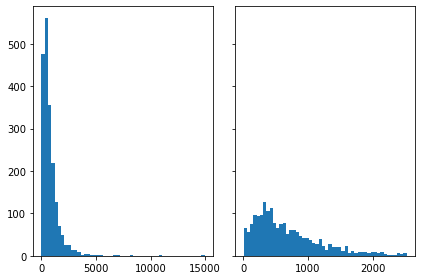

In [12]:

def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]


def histogram(x, y = []):
    n_bins = 50

    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

    # We can set the number of bins with the `bins` kwarg
    axs[0].hist(x, bins=n_bins)
    if(len(y) > 0):
        axs[1].hist(y, bins=n_bins)

    plt.show()

eventDescriptionLengths = []

for row in original_list:
    eventDescriptionLengths.append(len(row))

eventDescriptionLengths_rejectedOutliers = reject_outliers(np.array(eventDescriptionLengths))

print('Histogram dolžine opisa po dogodkih. Desni histogram je brez osamelcev(kjer je dolžina opisa zelo velika)')
histogram(eventDescriptionLengths, eventDescriptionLengths_rejectedOutliers)



#histogram(slStevilo, enStevilo)

Scatter histogram DOLŽINA OPISA V Slo/Ang


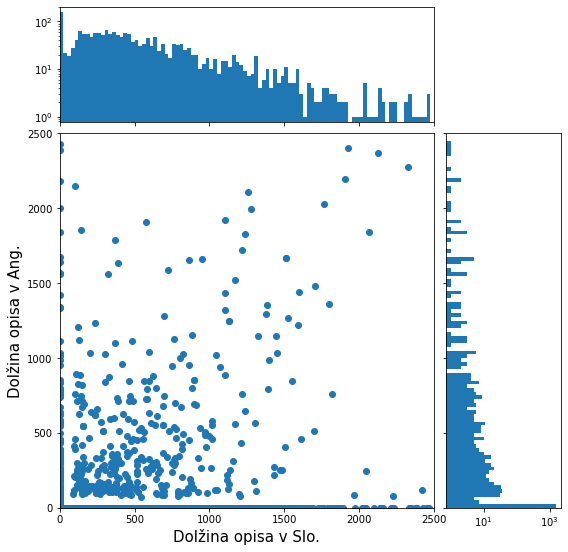

In [14]:

print('Scatter histogram DOLŽINA OPISA V Slo/Ang')
scatter_hist(slStevilo, enStevilo, 0, 2500, 'Dolžina opisa v Slo.', 'Dolžina opisa v Ang.')

Scatter histogram DOLŽINA OPISA V Slo/Ang - brez dogodkov kjer je opis v celoti(99%) v slovenščini


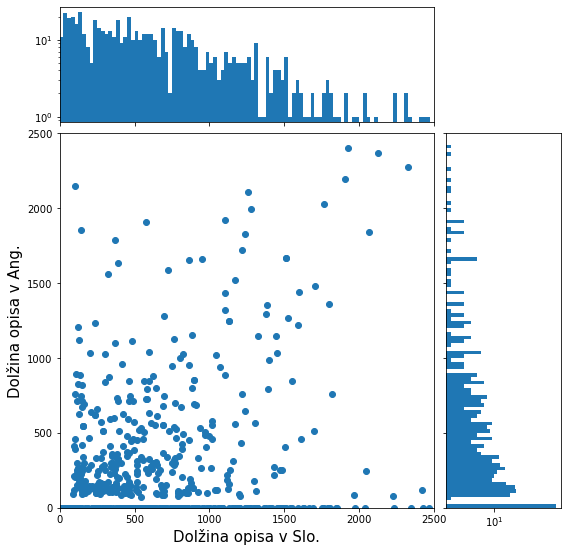

In [15]:

print('Scatter histogram DOLŽINA OPISA V Slo/Ang - brez dogodkov kjer je opis v celoti(99%) v slovenščini')
scatter_hist(slSteviloNoSlov, enSteviloNoSlov, 0, 2500, 'Dolžina opisa v Slo.', 'Dolžina opisa v Ang.')